In [39]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
sns.set(style = 'darkgrid', context = 'talk', palette = 'Dark2')
%matplotlib inline

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [52]:
start = "2015-01-01"
end =  "2019-12-31"
df = quandl.get("WIKI/TSLA", start_date = start, end_date = end)

In [53]:
df = df.Close

In [54]:
df

Date
2015-01-02    219.310
2015-01-05    210.090
2015-01-06    211.280
2015-01-07    210.950
2015-01-08    210.615
               ...   
2018-03-21    316.530
2018-03-22    309.100
2018-03-23    301.540
2018-03-26    304.180
2018-03-27    279.180
Name: Close, Length: 813, dtype: float64

In [55]:
short_rolling = df.rolling(window = 20).mean()
long_rolling = df.rolling(window = 100).mean()

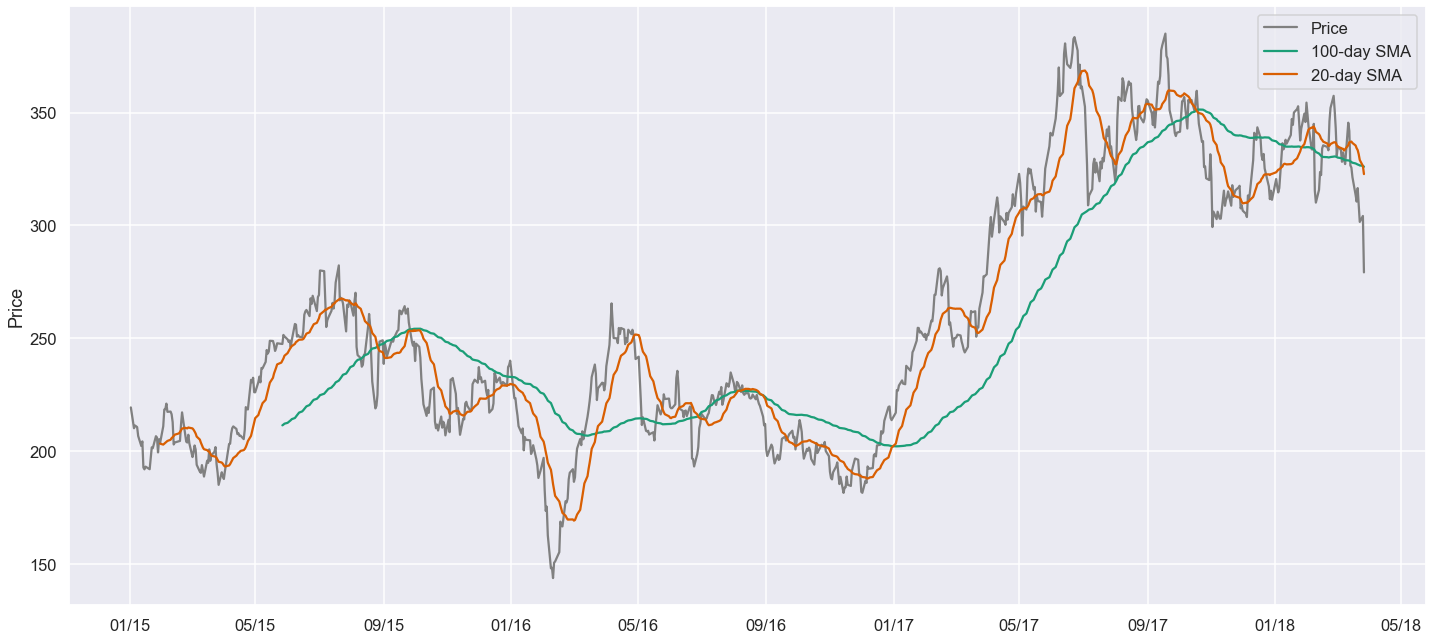

In [56]:

fig,ax = plt.subplots(figsize = (20,9))

ax.plot(df, label = 'Price', c = 'gray')
ax.plot(long_rolling, label = '100-day SMA')
ax.plot(short_rolling, label = '20-day SMA')

ax.legend(loc = 'best')
ax.set_ylabel('Price')
ax.xaxis.set_major_formatter(my_year_month_fmt)

plt.legend()
plt.tight_layout()

# Exponential Moving Average

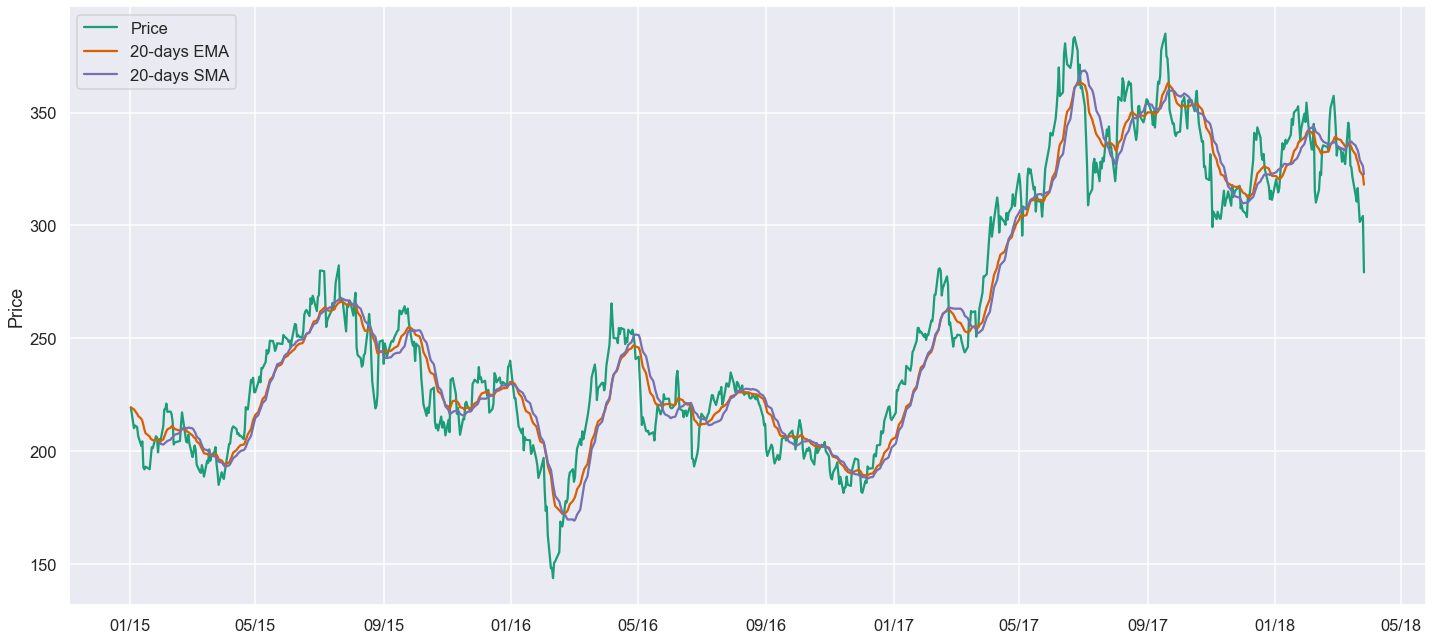

In [57]:
ema_short = df.ewm(span = 20, adjust = False).mean()

fig, ax = plt.subplots(figsize = (20,9))
ax.plot(df, label = 'Price')
ax.plot(ema_short, label = '20-days EMA')
ax.plot(short_rolling, label = '20-days SMA')

ax.legend(loc = 'upper left')
ax.set_ylabel('Price')
ax.xaxis.set_major_formatter(my_year_month_fmt)

plt.tight_layout()